# Credit Card Fraud Detection Documentation

This documentation provides an overview and explanation of the Python code for Credit Card Fraud Detection. The code is divided into sections and includes explanations for each step.

## Introduction

This Python code is designed to perform credit card fraud detection using various machine learning models. It aims to classify credit card transactions as either fraudulent or non-fraudulent based on a dataset of credit card transactions.

### Data Source

The code uses a dataset from Kaggle, which can be found at the following URL:
[Credit Card Fraud Detection Dataset on Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)

## Setup and Data Loading


In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [2]:
import pandas as pd
df = pd.read_csv('creditcard.csv')

- The code starts by setting up the Kaggle API credentials, which are required to download the dataset from Kaggle.
- It imports the `pandas` library and loads the dataset into a Pandas DataFrame named `df`.

## Exploratory Data Analysis (EDA)

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

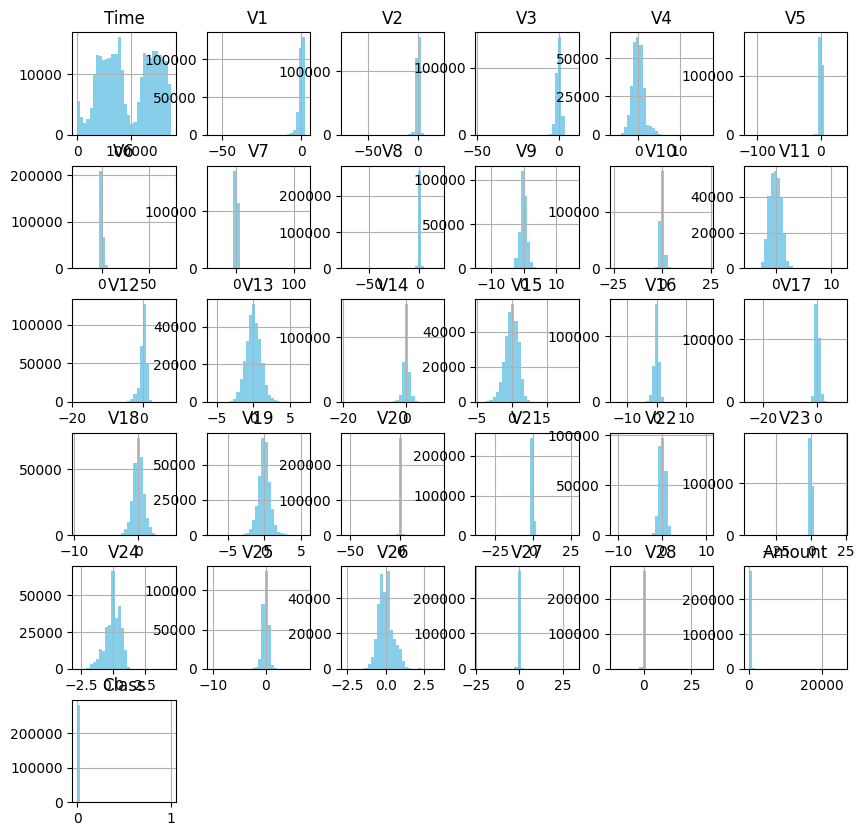

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
hist_color = 'skyblue'
df.hist(bins=30, figsize=(10, 10), color=hist_color)
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Histogram with Color')
plt.show()


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- The code begins by displaying the first few rows of the dataset to get a quick overview.
- It checks the class distribution to understand the balance between fraudulent and non-fraudulent transactions.
- Histograms are created to visualize the distribution of various features in the dataset.
- Summary statistics of the dataset are generated to provide insights into feature values.

## Data Preprocessing


In [7]:
from sklearn.preprocessing import RobustScaler
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1,1))
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [8]:
new_df['Amount'].describe()

count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
25%          -0.229162
50%           0.000000
75%           0.770838
max         358.683155
Name: Amount, dtype: float64

In [74]:
new_df = new_df.sample(frac = 1, random_state = 10)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
85148,0.350879,0.855339,-0.185819,0.120842,1.526485,-0.285417,-0.518320,0.479948,-0.175846,-0.026699,...,0.116620,0.168393,-0.225554,0.430973,0.670046,-0.269494,-0.003453,0.042840,2.044295,0
149762,0.531680,-0.505885,0.818266,-0.675985,0.314804,-1.357524,0.073789,0.489827,0.551774,1.612137,...,-0.185152,-0.318125,0.896097,0.997562,-2.464863,-0.914180,0.119750,0.180951,2.974219,0
209661,0.796640,2.085179,0.438030,-2.362942,1.108901,1.107774,-1.144720,1.045061,-0.516641,-0.603865,...,0.338745,1.181157,-0.280667,-0.270470,0.912059,-0.196488,-0.054088,-0.091348,-0.293440,0
222405,0.827330,-1.350580,-1.029833,-3.957191,-1.783271,-5.745423,1.814180,5.859076,-0.717178,-3.611308,...,0.344089,1.460073,0.939968,1.188477,-0.238870,0.132926,0.366899,-0.218311,18.693915,0
83376,0.346173,-0.869154,1.063008,0.531097,-0.434466,2.297790,3.836094,0.036158,0.900121,-0.515299,...,-0.218735,-0.682241,-0.208660,0.958966,0.234383,-0.553697,-0.617679,-0.437372,-0.167819,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147221,0.510753,-2.183964,2.872384,-1.537211,-1.327755,0.917332,-0.512355,1.213096,-0.350104,2.028610,...,-0.047185,1.059022,-0.104211,0.067335,-0.076049,-0.193235,1.501895,0.784850,-0.243415,0
51744,0.261007,-0.955900,0.960074,1.301019,-0.204221,1.736682,-0.742394,1.647719,-0.793022,-0.658262,...,-0.059512,0.109230,-0.650302,-0.413200,0.944704,-0.405218,-0.607829,-0.301245,-0.293440,0
51830,0.261262,1.212271,0.272509,0.349253,1.099325,-0.057433,-0.177223,-0.030707,0.015333,0.091770,...,-0.076109,-0.179511,-0.006329,-0.308991,0.464313,-0.395154,0.036796,0.018748,-0.279466,0
123263,0.444847,1.257227,0.408096,0.319266,0.685011,-0.302937,-1.052552,0.136991,-0.245655,-0.079491,...,-0.279430,-0.770134,0.119789,0.360130,0.241921,0.092261,-0.018228,0.032361,-0.282540,0


In [75]:
train, test, val = new_df[:240000],new_df[240000:262000], new_df[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()


(0    239581
 1       419
 Name: Class, dtype: int64,
 0    21963
 1       37
 Name: Class, dtype: int64,
 0    22771
 1       36
 Name: Class, dtype: int64)

In [76]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train.shape, test.shape, val.shape

((240000, 31), (22000, 31), (22807, 31))

In [77]:
x_train, y_train = train_np[:, :-1],train_np[:, -1]
x_test, y_test = train_np[:, :-1],train_np[:, -1]
x_val, y_val = train_np[:, :-1],train_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (240000, 30), (240000,), (240000, 30), (240000,))

- The code preprocesses the 'Amount' and 'Time' features using the RobustScaler and min-max scaling, respectively.
- It shuffles the dataset to ensure random ordering of samples.
- The dataset is split into training, testing, and validation sets, with their respective class distributions displayed.

## Model Building and Evaluation

### Logistic Regression


In [78]:
# predict model
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(x_train, y_train)

# Calculate the model's accuracy on the training data and convert it to a percentage
training_accuracy = logistic_model.score(x_train, y_train) * 100

# Print the training accuracy as a percentage
print(f"Training Accuracy: {training_accuracy:.2f}%")

Training Accuracy: 99.92%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_val, logistic_model.predict(x_val), target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    239581
       Fraud       0.89      0.63      0.74       419

    accuracy                           1.00    240000
   macro avg       0.94      0.81      0.87    240000
weighted avg       1.00      1.00      1.00    240000



- A logistic regression model is trained on the training data, and its accuracy on the training set is calculated.
- The classification report is generated to evaluate the logistic regression model's performance on the validation set.

### Shallow Neural Network

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(1, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1,'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

In [81]:
shallow_nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
 batch_normalization_7 (Batc  (None, 1)                4         
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 37
Trainable params: 35
Non-trainable params: 2
_________________________________________________________________


In [82]:
shallow_nn.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=5, callbacks = checkpoint)

Epoch 1/5
7496/7500 [============================>.] - ETA: 0s - loss: 0.0635 - accuracy: 0.9897

7500/7500 [==============================] - 30s 4ms/step - loss: 0.0634 - accuracy: 0.9897 - val_loss: 0.0074 - val_accuracy: 0.9994
Epoch 2/5
7493/7500 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9993

7500/7500 [==============================] - 27s 4ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0067 - val_accuracy: 0.9994
Epoch 3/5
7500/7500 [==============================] - 28s 4ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0075 - val_accuracy: 0.9994
Epoch 4/5
7500/7500 [==============================] - 26s 3ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0082 - val_accuracy: 0.9993
Epoch 5/5
7500/7500 [==============================] - 26s 3ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0086 - val_accuracy: 0.9994


In [83]:
def neural_net_prediction(model, x):
  return (shallow_nn.predict(x).flatten() > 0.5).astype(int)
neural_net_prediction(shallow_nn,x_val)

7500/7500 [==============================] - 17s 2ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [84]:
print(classification_report(y_val, neural_net_prediction(shallow_nn,x_val), target_names=['NotFraud', 'Fraud']))

7500/7500 [==============================] - 11s 1ms/step
              precision    recall  f1-score   support

    NotFraud       1.00      1.00      1.00    239581
       Fraud       0.83      0.80      0.81       419

    accuracy                           1.00    240000
   macro avg       0.91      0.90      0.91    240000
weighted avg       1.00      1.00      1.00    240000



- A shallow neural network is defined and trained on the training data using the Keras library.
- The model's architecture is displayed, and it is trained for a specified number of epochs.
- A custom function `neural_net_prediction` is defined to make predictions using the neural network.
- The classification report is generated to evaluate the neural network model's performance on the validation set.

### Random Forest, Gradient Boosting, and Linear SVM

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 2, n_jobs = -1)
rf.fit(x_train, y_train)
print(classification_report(y_val, rf.predict(x_val),target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    239584
       Fraud       0.86      0.56      0.68       416

    accuracy                           1.00    240000
   macro avg       0.93      0.78      0.84    240000
weighted avg       1.00      1.00      1.00    240000



In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate = 1.0, max_depth = 1, random_state = 0)
gbc.fit(x_train, y_train)
print(classification_report(y_val, gbc.predict(x_val),target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    239584
       Fraud       0.75      0.70      0.72       416

    accuracy                           1.00    240000
   macro avg       0.88      0.85      0.86    240000
weighted avg       1.00      1.00      1.00    240000



In [71]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight = 'balanced')
svc.fit(x_train,y_train)
print(classification_report(y_val, svc.predict(x_val),target_names = ['Not Fraud', 'Fraud']))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    239584
       Fraud       0.83      0.80      0.81       416

    accuracy                           1.00    240000
   macro avg       0.92      0.90      0.91    240000
weighted avg       1.00      1.00      1.00    240000



In [23]:
not_frauds = new_df.query('Class == 0')
frauds = new_df.query('Class == 1')
not_frauds ['Class'].value_counts(),  frauds['Class'].value_counts()

(0    284315
 Name: Class, dtype: int64,
 1    492
 Name: Class, dtype: int64)

- Random Forest, Gradient Boosting, and Linear SVM classifiers are trained and evaluated on the validation set.
- Classification reports are generated for each model to assess their performance.

## Data Balancing

In [24]:
balanced_df = pd. concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

- The code balances the dataset by oversampling the minority class (frauds) to address class imbalance.

### Model Evaluation on Balanced Data

In [25]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30383,0.207758,-0.736098,0.423303,0.933547,-1.500910,0.668052,0.576660,0.980383,0.172038,-0.632030,...,0.144032,0.195496,-0.207360,-1.211172,0.216169,1.001238,-0.054223,0.055914,1.078320,0
6820,0.049852,-2.169929,3.639654,-4.508498,2.730668,-2.122693,-2.341017,-4.235253,1.703538,-1.305279,...,0.645103,-0.503529,-0.000523,0.071696,0.092007,0.308498,0.552591,0.298954,-0.293440,1
243393,0.879184,-5.488032,3.329561,-5.996296,3.601720,-2.023926,-1.737393,-4.396859,0.228394,-1.675884,...,1.719631,0.343209,0.133584,0.833340,-0.839776,0.502010,-1.937473,1.521218,-0.307273,1
69929,0.310431,-1.985910,-2.611287,2.376770,-1.605756,0.609377,-0.967514,-1.635492,0.299546,-1.663646,...,-0.015521,-0.023986,0.187251,0.098769,0.596965,-0.143208,0.015346,0.101835,0.565500,0
281404,0.984762,1.911598,-0.397526,-1.683219,0.286647,0.399064,-0.451795,0.388839,-0.329302,0.507502,...,-0.234857,-0.699689,0.052040,-1.018716,-0.080524,0.329485,-0.086798,-0.053118,1.294348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242613,0.877170,-2.289141,1.016941,-0.926531,-0.121786,0.730164,-1.175610,-0.016360,0.732250,-0.295701,...,-0.237672,-0.711097,-0.466713,-0.431962,-0.150417,-0.530831,0.121851,0.034676,-0.167819,0
6717,0.048660,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,-3.796354,...,0.615642,-0.406427,-0.737018,-0.279642,1.106766,0.323885,0.894767,0.569519,-0.293440,1
113042,0.421923,-0.343369,1.092825,1.278107,0.066744,-0.024180,-0.985415,0.692278,-0.046993,-0.323509,...,-0.268206,-0.729425,-0.003556,0.315217,-0.175157,0.073711,0.241619,0.097346,-0.221477,0
154676,0.593442,-1.456876,3.740306,-7.404518,7.440964,-1.549878,-1.661697,-5.757213,1.615011,-2.194881,...,0.957897,0.145339,-0.044704,-0.544962,-0.757757,-0.005352,0.318152,-0.323554,-0.275554,1


In [27]:
balanced_df_np = balanced_df.to_numpy ()
x_train_b, y_train_b = balanced_df_np[:700, :-1], balanced_df_np[:700, -1].astype(int)
x_test_b, y_test_b = balanced_df_np[700:842, :-1], balanced_df_np[700:842, -1].astype(int)
x_val_b, y_val_b = balanced_df_np[842:, :-1], balanced_df_np[842:, -1].astype(int)
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape, x_val_b.shape, y_val_b.shape

((700, 30), (700,), (142, 30), (142,), (142, 30), (142,))

In [28]:
pd.Series(y_train).value_counts()

0.0    239586
1.0       414
dtype: int64

In [29]:
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(1    353
 0    347
 dtype: int64,
 0    73
 1    69
 dtype: int64,
 0    72
 1    70
 dtype: int64)

Logistic regression on sample

In [30]:
logistic_model_b = LogisticRegression()
logistic_model_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, logistic_model_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.90      0.97      0.93        72
       Fraud       0.97      0.89      0.93        70

    accuracy                           0.93       142
   macro avg       0.93      0.93      0.93       142
weighted avg       0.93      0.93      0.93       142



In [32]:
shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer((x_train.shape [1],)))
shallow_nn_b.add(Dense (2, 'relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense (1,'sigmoid'))
checkpoint = ModelCheckpoint ('shallow_n_b', save_best_only=True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=20, callbacks=checkpoint)

Epoch 1/20
20/22 [==========================>...] - ETA: 0s - loss: 0.7960 - accuracy: 0.4484

22/22 [==============================] - 5s 106ms/step - loss: 0.7934 - accuracy: 0.4571 - val_loss: 0.6698 - val_accuracy: 0.5775
Epoch 2/20
14/22 [==================>...........] - ETA: 0s - loss: 0.6927 - accuracy: 0.5714

22/22 [==============================] - 4s 175ms/step - loss: 0.6702 - accuracy: 0.6100 - val_loss: 0.6274 - val_accuracy: 0.6901
Epoch 3/20
 1/22 [>.............................] - ETA: 0s - loss: 0.6169 - accuracy: 0.7188

22/22 [==============================] - 1s 45ms/step - loss: 0.6359 - accuracy: 0.6514 - val_loss: 0.5994 - val_accuracy: 0.7254
Epoch 4/20
 1/22 [>.............................] - ETA: 0s - loss: 0.6716 - accuracy: 0.5938

22/22 [==============================] - 1s 45ms/step - loss: 0.6021 - accuracy: 0.6757 - val_loss: 0.5730 - val_accuracy: 0.7465
Epoch 5/20
 1/22 [>.............................] - ETA: 0s - loss: 0.5726 - accuracy: 0.7500

22/22 [==============================] - 1s 44ms/step - loss: 0.5876 - accuracy: 0.7014 - val_loss: 0.5497 - val_accuracy: 0.7676
Epoch 6/20
 1/22 [>.............................] - ETA: 0s - loss: 0.6141 - accuracy: 0.6875

22/22 [==============================] - 1s 45ms/step - loss: 0.5638 - accuracy: 0.7200 - val_loss: 0.5295 - val_accuracy: 0.7676
Epoch 7/20
 1/22 [>.............................] - ETA: 0s - loss: 0.5455 - accuracy: 0.7188

22/22 [==============================] - 1s 65ms/step - loss: 0.5516 - accuracy: 0.7286 - val_loss: 0.5118 - val_accuracy: 0.7676
Epoch 8/20
 1/22 [>.............................] - ETA: 0s - loss: 0.5174 - accuracy: 0.8438

22/22 [==============================] - 1s 46ms/step - loss: 0.5336 - accuracy: 0.7386 - val_loss: 0.4954 - val_accuracy: 0.7746
Epoch 9/20
 1/22 [>.............................] - ETA: 0s - loss: 0.5061 - accuracy: 0.7188

22/22 [==============================] - 1s 46ms/step - loss: 0.5184 - accuracy: 0.7543 - val_loss: 0.4802 - val_accuracy: 0.7746
Epoch 10/20
 1/22 [>.............................] - ETA: 0s - loss: 0.4723 - accuracy: 0.8438

22/22 [==============================] - 1s 45ms/step - loss: 0.4994 - accuracy: 0.7614 - val_loss: 0.4656 - val_accuracy: 0.7746
Epoch 11/20
 1/22 [>.............................] - ETA: 0s - loss: 0.5043 - accuracy: 0.7188

22/22 [==============================] - 1s 44ms/step - loss: 0.4884 - accuracy: 0.7914 - val_loss: 0.4523 - val_accuracy: 0.7817
Epoch 12/20
 1/22 [>.............................] - ETA: 0s - loss: 0.4646 - accuracy: 0.8125

22/22 [==============================] - 1s 63ms/step - loss: 0.4768 - accuracy: 0.8157 - val_loss: 0.4388 - val_accuracy: 0.7817
Epoch 13/20
18/22 [=======================>......] - ETA: 0s - loss: 0.4508 - accuracy: 0.8385

22/22 [==============================] - 1s 68ms/step - loss: 0.4541 - accuracy: 0.8243 - val_loss: 0.4252 - val_accuracy: 0.7958
Epoch 14/20
22/22 [==============================] - ETA: 0s - loss: 0.4390 - accuracy: 0.8343

22/22 [==============================] - 1s 48ms/step - loss: 0.4390 - accuracy: 0.8343 - val_loss: 0.4122 - val_accuracy: 0.8944
Epoch 15/20
 1/22 [>.............................] - ETA: 0s - loss: 0.4108 - accuracy: 0.7812

22/22 [==============================] - 1s 46ms/step - loss: 0.4293 - accuracy: 0.8471 - val_loss: 0.3982 - val_accuracy: 0.9225
Epoch 16/20
 1/22 [>.............................] - ETA: 0s - loss: 0.4353 - accuracy: 0.8750

22/22 [==============================] - 1s 67ms/step - loss: 0.4002 - accuracy: 0.8814 - val_loss: 0.3873 - val_accuracy: 0.9225
Epoch 17/20
 1/22 [>.............................] - ETA: 0s - loss: 0.3792 - accuracy: 0.8750

22/22 [==============================] - 1s 48ms/step - loss: 0.3947 - accuracy: 0.8757 - val_loss: 0.3773 - val_accuracy: 0.9225
Epoch 18/20
 1/22 [>.............................] - ETA: 0s - loss: 0.3559 - accuracy: 0.8438

22/22 [==============================] - 1s 45ms/step - loss: 0.3761 - accuracy: 0.8743 - val_loss: 0.3654 - val_accuracy: 0.9155
Epoch 19/20
 1/22 [>.............................] - ETA: 0s - loss: 0.3507 - accuracy: 0.9688

22/22 [==============================] - 1s 47ms/step - loss: 0.3604 - accuracy: 0.9071 - val_loss: 0.3543 - val_accuracy: 0.9225
Epoch 20/20
 1/22 [>.............................] - ETA: 0s - loss: 0.3875 - accuracy: 0.7812

22/22 [==============================] - 1s 46ms/step - loss: 0.3449 - accuracy: 0.8957 - val_loss: 0.3411 - val_accuracy: 0.9225


In [34]:
shallow_nn_b.fit(x_train_b,y_train_b,validation_data=(x_val_b,y_val_b), epochs = 20, callbacks=checkpoint)

Epoch 1/20
15/22 [===================>..........] - ETA: 0s - loss: 0.2776 - accuracy: 0.9271

22/22 [==============================] - 2s 86ms/step - loss: 0.2703 - accuracy: 0.9357 - val_loss: 0.2761 - val_accuracy: 0.9155
Epoch 2/20
 9/22 [===========>..................] - ETA: 0s - loss: 0.3003 - accuracy: 0.9167

22/22 [==============================] - 2s 89ms/step - loss: 0.2630 - accuracy: 0.9257 - val_loss: 0.2727 - val_accuracy: 0.9155
Epoch 3/20
 1/22 [>.............................] - ETA: 0s - loss: 0.2860 - accuracy: 0.9062

22/22 [==============================] - 1s 59ms/step - loss: 0.2549 - accuracy: 0.9300 - val_loss: 0.2692 - val_accuracy: 0.9155
Epoch 4/20
15/22 [===================>..........] - ETA: 0s - loss: 0.2599 - accuracy: 0.9375

22/22 [==============================] - 1s 70ms/step - loss: 0.2511 - accuracy: 0.9343 - val_loss: 0.2664 - val_accuracy: 0.9085
Epoch 5/20
18/22 [=======================>......] - ETA: 0s - loss: 0.2524 - accuracy: 0.9375

22/22 [==============================] - 1s 50ms/step - loss: 0.2553 - accuracy: 0.9329 - val_loss: 0.2632 - val_accuracy: 0.9085
Epoch 6/20
 1/22 [>.............................] - ETA: 0s - loss: 0.2120 - accuracy: 0.9688

22/22 [==============================] - 1s 46ms/step - loss: 0.2386 - accuracy: 0.9414 - val_loss: 0.2623 - val_accuracy: 0.9085
Epoch 7/20
 1/22 [>.............................] - ETA: 0s - loss: 0.3381 - accuracy: 0.9375

22/22 [==============================] - 1s 45ms/step - loss: 0.2436 - accuracy: 0.9286 - val_loss: 0.2595 - val_accuracy: 0.9085
Epoch 8/20
 1/22 [>.............................] - ETA: 0s - loss: 0.2567 - accuracy: 0.9375

22/22 [==============================] - 1s 70ms/step - loss: 0.2328 - accuracy: 0.9414 - val_loss: 0.2580 - val_accuracy: 0.9085
Epoch 9/20
 1/22 [>.............................] - ETA: 0s - loss: 0.1926 - accuracy: 1.0000

22/22 [==============================] - 1s 49ms/step - loss: 0.2241 - accuracy: 0.9286 - val_loss: 0.2566 - val_accuracy: 0.9085
Epoch 10/20
 1/22 [>.............................] - ETA: 0s - loss: 0.1915 - accuracy: 0.9688

22/22 [==============================] - 1s 47ms/step - loss: 0.2263 - accuracy: 0.9229 - val_loss: 0.2534 - val_accuracy: 0.9085
Epoch 11/20
22/22 [==============================] - ETA: 0s - loss: 0.2246 - accuracy: 0.9400

22/22 [==============================] - 1s 49ms/step - loss: 0.2246 - accuracy: 0.9400 - val_loss: 0.2520 - val_accuracy: 0.9085
Epoch 12/20
 1/22 [>.............................] - ETA: 0s - loss: 0.3313 - accuracy: 0.9375

22/22 [==============================] - 1s 46ms/step - loss: 0.2257 - accuracy: 0.9371 - val_loss: 0.2509 - val_accuracy: 0.9085
Epoch 13/20
 1/22 [>.............................] - ETA: 0s - loss: 0.2103 - accuracy: 0.9688

22/22 [==============================] - 1s 55ms/step - loss: 0.2140 - accuracy: 0.9371 - val_loss: 0.2495 - val_accuracy: 0.9085
Epoch 14/20
16/22 [====================>.........] - ETA: 0s - loss: 0.2208 - accuracy: 0.9512

22/22 [==============================] - 2s 71ms/step - loss: 0.2111 - accuracy: 0.9486 - val_loss: 0.2486 - val_accuracy: 0.9085
Epoch 15/20
15/22 [===================>..........] - ETA: 0s - loss: 0.2103 - accuracy: 0.9438

22/22 [==============================] - 2s 72ms/step - loss: 0.2202 - accuracy: 0.9243 - val_loss: 0.2474 - val_accuracy: 0.9155
Epoch 16/20
22/22 [==============================] - 0s 7ms/step - loss: 0.2094 - accuracy: 0.9429 - val_loss: 0.2486 - val_accuracy: 0.9155
Epoch 17/20
16/22 [====================>.........] - ETA: 0s - loss: 0.1987 - accuracy: 0.9492

22/22 [==============================] - 1s 69ms/step - loss: 0.2079 - accuracy: 0.9500 - val_loss: 0.2449 - val_accuracy: 0.9155
Epoch 18/20
22/22 [==============================] - 0s 4ms/step - loss: 0.2023 - accuracy: 0.9500 - val_loss: 0.2455 - val_accuracy: 0.9155
Epoch 19/20
 1/22 [>.............................] - ETA: 0s - loss: 0.2000 - accuracy: 0.9375

22/22 [==============================] - 1s 47ms/step - loss: 0.1998 - accuracy: 0.9429 - val_loss: 0.2436 - val_accuracy: 0.9155
Epoch 20/20
 1/22 [>.............................] - ETA: 0s - loss: 0.1664 - accuracy: 0.9375

22/22 [==============================] - 1s 70ms/step - loss: 0.1988 - accuracy: 0.9429 - val_loss: 0.2428 - val_accuracy: 0.9155


In [35]:
print(classification_report(y_val_b, neural_net_prediction(shallow_nn_b, x_val_b), target_names=['Not Fraud', 'Fraud']))

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

   Not Fraud       0.86      1.00      0.92        72
       Fraud       1.00      0.83      0.91        70

    accuracy                           0.92       142
   macro avg       0.93      0.91      0.91       142
weighted avg       0.93      0.92      0.91       142



In [36]:
shallow_nn_b1 = Sequential()
shallow_nn_b1.add(InputLayer((x_train.shape [1],)))
shallow_nn_b1.add(Dense (1, 'relu'))
shallow_nn_b1.add(BatchNormalization())
shallow_nn_b1.add(Dense (1,'sigmoid'))
checkpoint = ModelCheckpoint ('shallow_n_b', save_best_only=True)
shallow_nn_b1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b1.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=10, callbacks=checkpoint)

Epoch 1/10
 1/22 [>.............................] - ETA: 21s - loss: 0.7238 - accuracy: 0.5625

22/22 [==============================] - 2s 54ms/step - loss: 0.6060 - accuracy: 0.6743 - val_loss: 0.5811 - val_accuracy: 0.6761
Epoch 2/10
 1/22 [>.............................] - ETA: 0s - loss: 0.5690 - accuracy: 0.7188

22/22 [==============================] - 1s 46ms/step - loss: 0.5682 - accuracy: 0.7100 - val_loss: 0.5244 - val_accuracy: 0.7324
Epoch 3/10
 1/22 [>.............................] - ETA: 0s - loss: 0.5737 - accuracy: 0.7500

22/22 [==============================] - 1s 66ms/step - loss: 0.5454 - accuracy: 0.7457 - val_loss: 0.4912 - val_accuracy: 0.7606
Epoch 4/10
19/22 [========================>.....] - ETA: 0s - loss: 0.5357 - accuracy: 0.7714

22/22 [==============================] - 1s 64ms/step - loss: 0.5313 - accuracy: 0.7786 - val_loss: 0.4719 - val_accuracy: 0.7958
Epoch 5/10
 1/22 [>.............................] - ETA: 0s - loss: 0.5626 - accuracy: 0.7188

22/22 [==============================] - 1s 46ms/step - loss: 0.5145 - accuracy: 0.7886 - val_loss: 0.4554 - val_accuracy: 0.8028
Epoch 6/10
 1/22 [>.............................] - ETA: 0s - loss: 0.4707 - accuracy: 0.8438

22/22 [==============================] - 1s 46ms/step - loss: 0.4968 - accuracy: 0.8086 - val_loss: 0.4402 - val_accuracy: 0.8239
Epoch 7/10
 1/22 [>.............................] - ETA: 0s - loss: 0.5021 - accuracy: 0.8750

22/22 [==============================] - 1s 46ms/step - loss: 0.4849 - accuracy: 0.8200 - val_loss: 0.4263 - val_accuracy: 0.8310
Epoch 8/10
 1/22 [>.............................] - ETA: 0s - loss: 0.4828 - accuracy: 0.8125

22/22 [==============================] - 1s 45ms/step - loss: 0.4689 - accuracy: 0.8343 - val_loss: 0.4140 - val_accuracy: 0.8521
Epoch 9/10
 1/22 [>.............................] - ETA: 0s - loss: 0.4673 - accuracy: 0.8438

22/22 [==============================] - 1s 66ms/step - loss: 0.4500 - accuracy: 0.8414 - val_loss: 0.4046 - val_accuracy: 0.8592
Epoch 10/10
 1/22 [>.............................] - ETA: 0s - loss: 0.3678 - accuracy: 0.9688

22/22 [==============================] - 1s 46ms/step - loss: 0.4460 - accuracy: 0.8486 - val_loss: 0.3968 - val_accuracy: 0.8732


In [37]:
print(classification_report(y_val_b, neural_net_prediction(shallow_nn_b1, x_val_b), target_names=['Not Fraud', 'Fraud']))

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

   Not Fraud       0.86      1.00      0.92        72
       Fraud       1.00      0.83      0.91        70

    accuracy                           0.92       142
   macro avg       0.93      0.91      0.91       142
weighted avg       0.93      0.92      0.91       142



In [38]:
rf = RandomForestClassifier(max_depth = 2, n_jobs = -1)
rf.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, rf.predict(x_val_b),target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.86      1.00      0.92        72
       Fraud       1.00      0.83      0.91        70

    accuracy                           0.92       142
   macro avg       0.93      0.91      0.91       142
weighted avg       0.93      0.92      0.91       142



In [39]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate = 1.0, max_depth = 1, random_state = 0)
gbc.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, gbc.predict(x_val_b),target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.89      0.93      0.91        72
       Fraud       0.93      0.89      0.91        70

    accuracy                           0.91       142
   macro avg       0.91      0.91      0.91       142
weighted avg       0.91      0.91      0.91       142



In [40]:
svc = LinearSVC(class_weight = 'balanced')
svc.fit(x_train_b,y_train_b)
print(classification_report(y_val_b, svc.predict(x_val_b),target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.89      0.97      0.93        72
       Fraud       0.97      0.87      0.92        70

    accuracy                           0.92       142
   macro avg       0.93      0.92      0.92       142
weighted avg       0.93      0.92      0.92       142



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [41]:
print(classification_report(y_test_b, neural_net_prediction (shallow_nn, x_test_b), target_names=['Not Fraud', 'Fraud']))

5/5 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

   Not Fraud       0.85      1.00      0.92        73
       Fraud       1.00      0.81      0.90        69

    accuracy                           0.91       142
   macro avg       0.92      0.91      0.91       142
weighted avg       0.92      0.91      0.91       142



- The balanced dataset is split into training, testing, and validation sets.
- Various models (Logistic Regression, Shallow Neural Network, Random Forest, Gradient Boosting, and Linear SVM) are trained and evaluated on the balanced data.
- Classification reports are generated for each model on the validation set for performance assessment.

## Conclusion

This Python code demonstrates the process of credit card fraud detection using machine learning techniques. It covers data preprocessing, model building, and evaluation, as well as handling class imbalance through data balancing techniques. The code can serve as a foundation for building and deploying fraud detection systems in real-world scenarios.

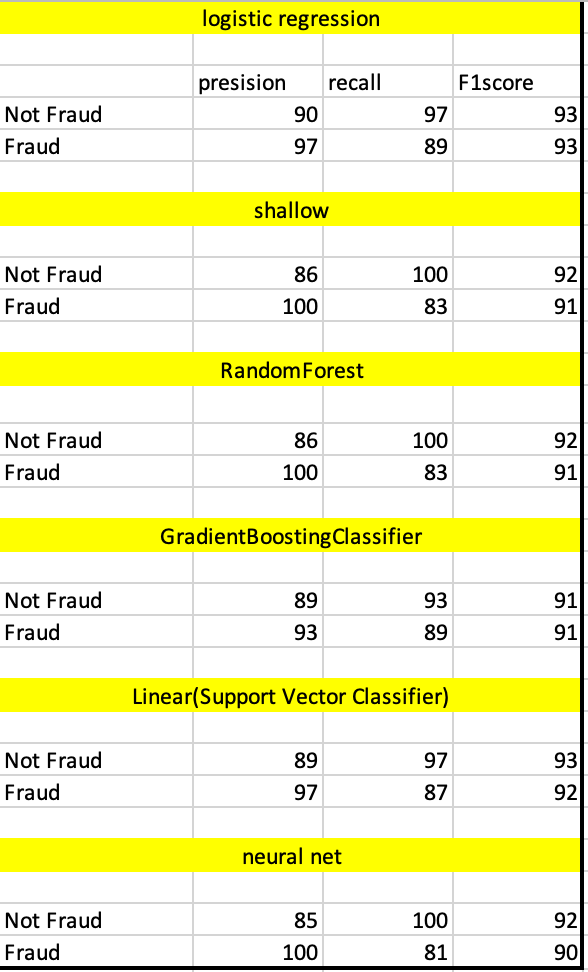